# Plotting Basic Healpix Grids

## Interactive

In [1]:
# Interactive HEALPix index map with toggles for labels/centers/ring-nest ordering
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, ToggleButtons, Checkbox

def show_map(k=0, ordering='RING', grid=True, labels=False, centers=False, polar_belt=False):
    nside = 1 << k
    npix  = hp.nside2npix(nside)
    nest  = (ordering == 'NEST')
    m = np.arange(npix, dtype=float)  # color by pixel index

    # Fresh figure every call
    plt.close('all')
    fig = plt.figure(figsize=(10, 5.5))

    kwargs = dict(
        title=f"HEALPix indices — {ordering}, nside={nside}, npix={npix}",
        nest=nest, cbar=True, reuse_axes=False, fig=fig.number
    )
    # flip='astro' if available (RA increases to the left)
    try:
        hp.mollview(m, flip='astro', hold=False, **kwargs)
    except TypeError:
        try:
            hp.mollview(m, flip='astro', **kwargs)
        except TypeError:
            hp.mollview(m, **kwargs)

    if grid:
        hp.graticule(dpar=15, dmer=30, alpha=0.4)

    # Pre-compute centers only once if needed
    th = ph = None
    if (labels or centers or polar_belt) and nside <= 8:
        th, ph = hp.pix2ang(nside, np.arange(npix), nest=nest)

    # ----- labels on pixel centers -----
    if labels:
        if nside <= 8:  # keep it readable/fast
            # Pixel centers in (theta, phi) already computed
            fs = 10 if nside <= 4 else 8
            for pid, t, p in zip(range(npix), th, ph):
                hp.projtext(t, p, str(pid), lonlat=False,
                            color='w', fontsize=fs, ha='center', va='center')
        else:
            # gentle note if too dense
            fig.text(0.5, 0.03, "Pixel labels disabled (too dense/slow).",
                     ha='center', va='center', fontsize=10, color='0.3')

    # ----- pixel centers (all) -----
    if centers:
        if nside <= 8:
            hp.projscatter(th, ph, color='r', lonlat=False)
        else:
            fig.text(0.5, 0.06, "Centers disabled (too dense/slow).",
                     ha='center', va='center', fontsize=10, color='0.3')

    # ----- polar vs belt markers -----
    if polar_belt:
        if nside <= 8:
            z = np.cos(th)   # z = cos(theta); polar caps defined by |z| >= 2/3
            polar_mask = np.abs(z) >= 2.0 / 3.0
            belt_mask  = ~polar_mask

            # Polar pixels: triangles
            hp.projscatter(th[polar_mask], ph[polar_mask],
                           lonlat=False, marker='o', s=40, edgecolor='w', facecolor='none')
            # Belt pixels: circles
            hp.projscatter(th[belt_mask], ph[belt_mask],
                           lonlat=False, marker='o', s=40, edgecolor='r', facecolor='none')
        else:
            fig.text(0.5, 0.09, "Polar vs belt markers disabled (too dense/slow).",
                     ha='center', va='center', fontsize=10, color='0.3')

    plt.show()

_ = interact(show_map,
    k=IntSlider(value=0, min=0, max=4, step=1, description='Order k'),
    ordering=ToggleButtons(options=['RING', 'NEST'], value='RING', description='Ordering'),
    grid=Checkbox(value=True, description='Graticule'),
    labels=Checkbox(value=False, description='Show labels'),
    centers=Checkbox(value=False, description='Show centers'),
    polar_belt=Checkbox(value=False, description='Polar vs belt')
)

interactive(children=(IntSlider(value=0, description='Order k', max=4), ToggleButtons(description='Ordering', …

## Static

In [ ]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

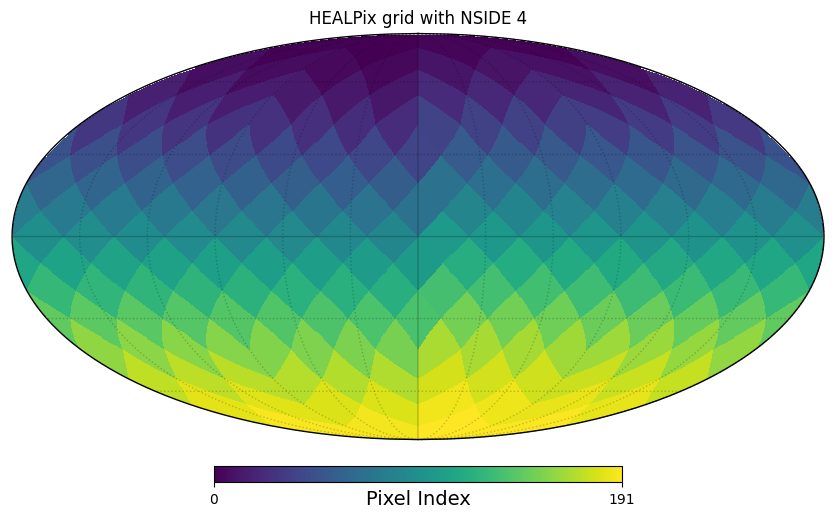

In [24]:
# 1. Define the resolution (NSIDE)
# NSIDE determines the number of pixels (NPIX) in the map: NPIX = 12 * NSIDE^2
nside = 4  # A low nside makes the individual pixels visible
npix = hp.nside2npix(nside)

# 2. Create a dummy HEALPix map
m = np.arange(npix, dtype=float)

# 3. Visualize the map in Mollweide projection
hp.mollview(m, title=f"HEALPix grid with NSIDE {nside}", unit="Pixel Index")
hp.graticule(alpha=0.2)

# 4. Display the plot
plt.show()

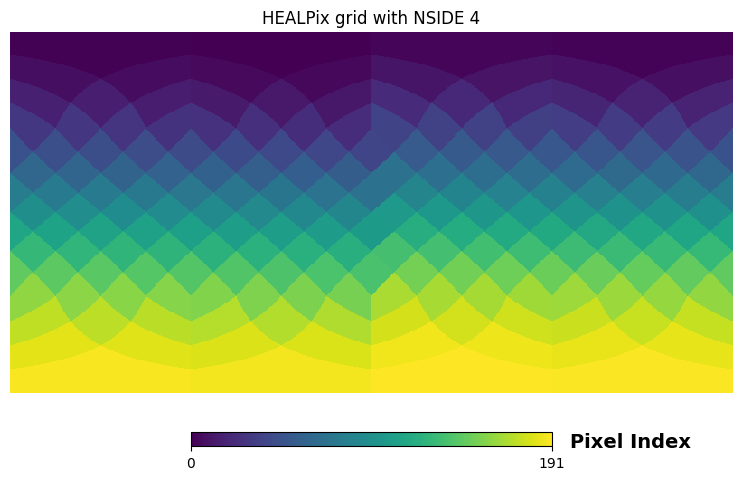

In [17]:
nside = 4  # A low nside makes the individual pixels visible
npix = hp.nside2npix(nside)
m = np.arange(npix, dtype=float)
hp.cartview(m, title=f"HEALPix grid with NSIDE {nside}", unit="Pixel Index")
plt.show()

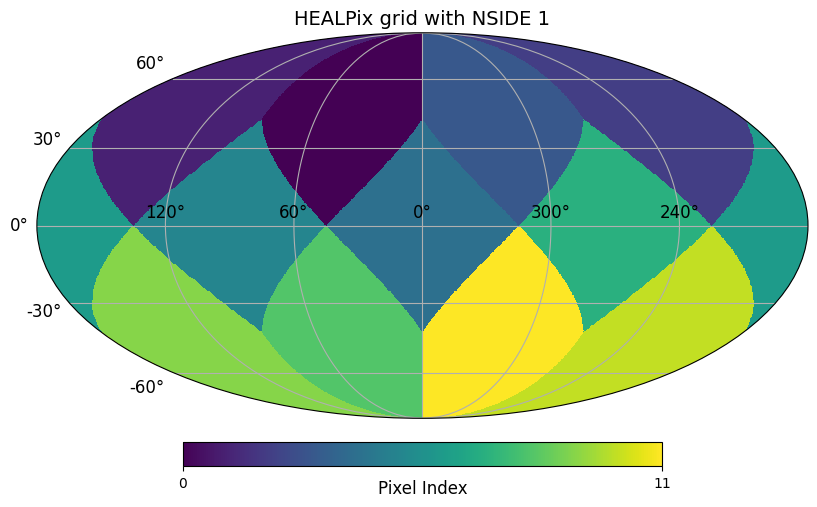

In [10]:
nside = 1  # A low nside makes the individual pixels visible
npix = hp.nside2npix(nside)
m = np.arange(npix, dtype=float)
hp.projview(m, title=f"HEALPix grid with NSIDE {nside}", unit="Pixel Index", projection_type='mollweide', 
            graticule=True, graticule_labels=True)
plt.show()

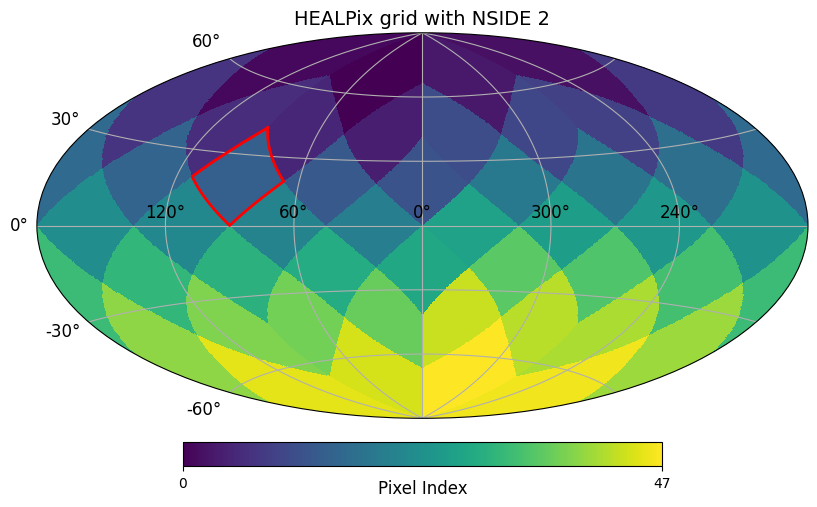

In [92]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

nside = 2
m = np.arange(hp.nside2npix(nside), dtype=float)

hp.projview(m, projection_type='aitoff', unit='Pixel Index',
            title=f'HEALPix grid with NSIDE {nside}',
            graticule=True, graticule_labels=True, nest=False)

pix = 14  # RING index

# boundaries -> (3, N); transpose to (N, 3) before converting to angles
vecs = hp.boundaries(nside, pix, step=1, nest=False)          # (3, N)
lon, lat = hp.vec2ang(vecs.T, lonlat=True)                     # degrees

# (optional) wrap to [-180, 180] to match Aitoff ticks
lon = (lon + 180.0) % 360.0 - 180.0

# close polygon and draw
lon = np.append(lon, lon[0]);  lat = np.append(lat, lat[0])
hp.newprojplot(lon, lat, lonlat=True, color='red', linewidth=2)   # or hp.newprojplot(...)
plt.show()

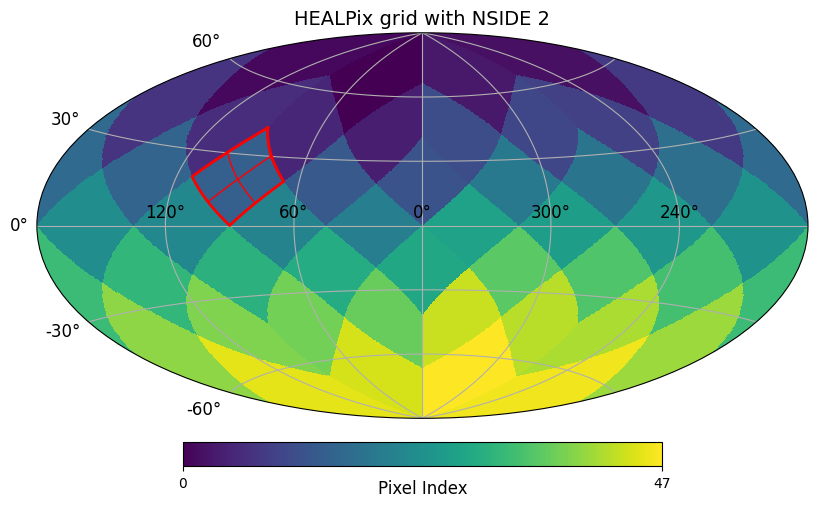

In [100]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

nside = 2
m = np.arange(hp.nside2npix(nside), dtype=float)

# Draw the base map (RING)
hp.projview(m, projection_type='aitoff', unit='Pixel Index',
            title=f'HEALPix grid with NSIDE {nside}',
            graticule=True, graticule_labels=True, nest=False)

pix = 14  # parent pixel in RING

# First, overlay the parent boundary (RING) – you already have this:
vecs_parent = hp.boundaries(nside, pix, step=1, nest=False)      # (3, N)
lon_p, lat_p = hp.vec2ang(vecs_parent.T, lonlat=True)
lon_p = (lon_p + 180.0) % 360.0 - 180.0
lon_p = np.append(lon_p, lon_p[0]); lat_p = np.append(lat_p, lat_p[0])
hp.newprojplot(lon_p, lat_p, lonlat=True, color='red', linewidth=2)

# ---------- Overlay the four subpixels at the next order ----------
nside_child = nside * 2

# Convert parent RING -> NEST to get children easily
parent_nest = hp.ring2nest(nside, pix)

# Children in NEST: 4*iparent + {0,1,2,3}
child_nest = 4 * parent_nest + np.arange(4, dtype=int)

# If you want the global child indices in RING (optional):
# child_ring = hp.nest2ring(nside_child, child_nest)

# Draw each child boundary (using nest=True because indices are NEST)
for i, cn in enumerate(child_nest):
    vecs_child = hp.boundaries(nside_child, cn, step=1, nest=True)  # (3, N)
    lon_c, lat_c = hp.vec2ang(vecs_child.T, lonlat=True)
    lon_c = (lon_c + 180.0) % 360.0 - 180.0
    lon_c = np.append(lon_c, lon_c[0]); lat_c = np.append(lat_c, lat_c[0])

    # Slightly thinner line + alpha so you can see overlaps
    hp.newprojplot(lon_c, lat_c, lonlat=True, linewidth=0.9, alpha=0.8, color='r')

    # Optional: label with child local index (0..3) near its center
    # (Compute center from ang2vec of child center)
    theta_ctr, phi_ctr = hp.pix2ang(nside_child, cn, nest=True)
    lon_ctr = np.degrees(phi_ctr); lat_ctr = np.degrees(0.5*np.pi - theta_ctr)
    lon_ctr = (lon_ctr + 180.0) % 360.0 - 180.0
    hp.projtext(lon_ctr, lat_ctr, f'{i}', lonlat=True, fontsize=8)

plt.show()
